In [129]:
#importimg libraries ----step: 0

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors 
sns.set(style = "whitegrid")
%matplotlib inline

In [130]:
#Loading Data set step :1
#.......................................
#.......................................
df = pd.read_csv("HealthInsurance.csv")
print("Data set shape :",df.shape)
display(df.head())
df.columns = df.columns.str.strip()

Data set shape : (8802, 12)


,rownames,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
0,1,yes,31,no,male,yes,yes,yes,4,south,cauc,bachelor
1,2,yes,31,no,female,yes,yes,no,4,south,cauc,highschool
2,3,yes,54,no,male,yes,yes,no,5,west,cauc,ged
3,4,yes,27,no,male,yes,no,no,5,west,cauc,highschool
4,5,yes,39,no,male,yes,yes,no,5,west,cauc,none


In [131]:
df["married"].dtype

dtype('O')

In [132]:
#Data Inspection!!!!!!!!!!!!! step :2
print("\nColumn names :",df.columns.tolist())
print("\nData types :\n",df.dtypes)
print("\nMissing values per column :\n",df.isnull().sum())


Column names : ['rownames', 'health', 'age', 'limit', 'gender', 'insurance', 'married', 'selfemp', 'family', 'region', 'ethnicity', 'education']

Data types :
 rownames      int64
health       object
age           int64
limit        object
gender       object
insurance    object
married      object
selfemp      object
family        int64
region       object
ethnicity    object
education    object
dtype: object

Missing values per column :
 rownames     0
health       0
age          0
limit        0
gender       0
insurance    0
married      0
selfemp      0
family       0
region       0
ethnicity    0
education    0
dtype: int64


In [133]:
#Data cleaning ......step:3

#Convert selected columns to categorical type

categorical_cols = ["insurance","ethnicity","gender","married","region"]
for col in categorical_cols:
    if col in df.columns:
        df[col]=df[col].astype("category")

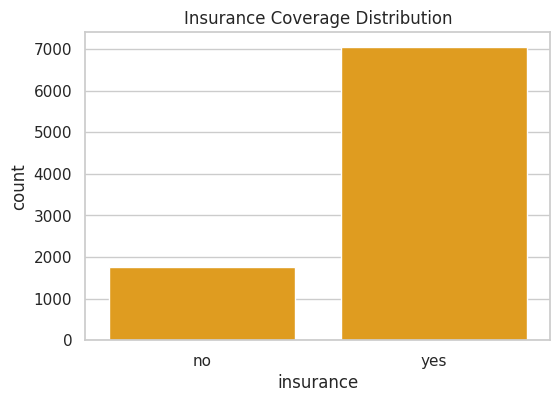

In [134]:
#Exploratory Data Analysis (EDA)

#1 Distribution of insurance Coverage 
#..............._____________________________
if "insurance" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="insurance",data=df,color="orange")
    plt.title("Insurance Coverage Distribution")
    plt.show()
%matplotlib inline

In [135]:
#boxplot : income vs insurance

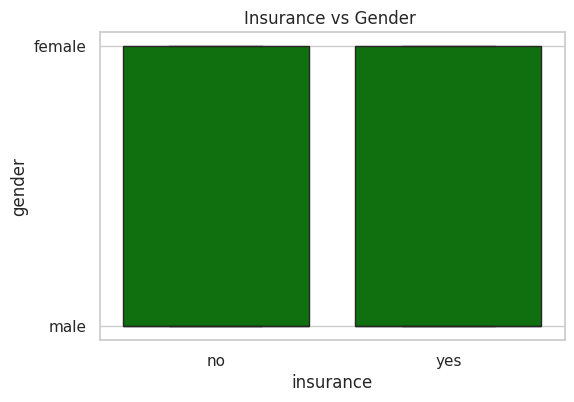

insurance        no       yes
gender                       
female     0.171504  0.828496
male       0.223397  0.776603


In [136]:
if "insurance" and "gender" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="insurance",y="gender",data=df,color="green")
    plt.title("Insurance vs Gender ")
    plt.show()
    #imsurance vs gender crosstab
    print(pd.crosstab(df["gender"],df["insurance"], normalize="index"))
    



In [137]:
#converting objects into numberic data for the regression model 

#......
#.......
#.......

df["insurance_encoded"]=df["insurance"].map({"yes":1,"no":0}).astype("int")
df["married"] = df["married"].map({"yes":1,"no":0}).astype("int")

In [138]:
df.dtypes

rownames                int64
health                 object
age                     int64
limit                  object
gender               category
insurance            category
married                 int64
selfemp                object
family                  int64
region               category
ethnicity            category
education              object
insurance_encoded       int64
dtype: object

In [139]:
# logistics Regression_prediction... Insurance 

#Define outcome and predictors 

X = df[["age","married","family"]]
y=df["insurance_encoded"]
X=pd.get_dummies(X,drop_first=True)
X=sm.add_constant(X)
logit_model= sm.Logit(y,X).fit(disp=False)
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:      insurance_encoded   No. Observations:                 8802
Model:                          Logit   Df Residuals:                     8798
Method:                           MLE   Df Model:                            3
Date:                Thu, 02 Oct 2025   Pseudo R-squ.:                 0.05383
Time:                        12:58:03   Log-Likelihood:                -4153.8
converged:                       True   LL-Null:                       -4390.1
Covariance Type:            nonrobust   LLR p-value:                4.010e-102
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7249      0.117      6.183      0.000       0.495       0.955
age            0.0188      0.003      6.945      0.000       0.013       0.024
married        0.9444      0.062     15.341      0.0